In [ ]:
import warnings
warnings.simplefilter("ignore")

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Métodos de evaluación 

Por ahora hemos visto que:
    
- Se necesita **separar de forma aleatoria** en datos de entrenamiento y testeo para poder evaluar performance del algoritmo
- Existen diversas **métricas para evaluar rendimiento**, y elegimos la nuestra según las caracteristicas de nuestro problema
- Es útil **apoyar la evaluación con visualizaciones de errores**, como por ejemplo scatterplots de residuales

Sin embargo nuestro método hasta ahora tiene una falla. Este depende de la forma en que fueron elegidos nuestros datos de forma aleatoria:

- Podemos tener suerte y caer en un train set y test set que sea ideal para nuestro modelo.
- Podemos tener pésima performance con esa separación de datos pero no en otros.

** Controlar la aleatoridad en train_test_split**

train_test_split separa cada vez que lo llamamos los datos de forma diferente. Para poder comparar modelos, hacer un código más limpio y compacto y para poder hacer nuestros experimentos reproducibles utilizaremos el parametro *random_state*.

In [2]:
X = pd.read_csv('../vol/intermediate_results/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)

In [9]:
X2_train,X2_test, y2_train,y2_test = train_test_split(X,y, random_state=1)

In [10]:
pd.DataFrame.equals(X_train,X2_train)

True

**Cross Validation**

<img src="img/crossval.png">

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0.59316596,  0.68931527,  0.55383855,  0.18147236,  0.23040894])

In [12]:
scores.mean()

0.44964021745791793

In [13]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.79261902949633645

## Selección de modelos

** Overfitting o underfitting?**

Recuerden que para saber si estamos en overfitting o en underfitting necesitamos los scores de entrenamiento y test.

In [16]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.5/site-packages


In [17]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'fit_time': array([ 0.00688601,  0.00739503,  0.01647115,  0.05436873,  0.05301976]),
 'score_time': array([ 0.0004952 ,  0.00049186,  0.00062156,  0.00069237,  0.00061393]),
 'test_score': array([ 0.59316596,  0.68931527,  0.55383855,  0.18147236,  0.23040894]),
 'train_score': array([ 0.68988012,  0.77004932,  0.76604995,  0.76123379,  0.75837599])}

In [18]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.749117836304
0.449640217458


Tenemos bias por lo que buscaremos modelos más complejos.

** Validation Curves y Learning Curves **

In [19]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(), X, y, cv=5)

{'fit_time': array([ 0.00543714,  0.00307131,  0.00355124,  0.00312901,  0.00317121]),
 'score_time': array([ 0.0024519 ,  0.00276566,  0.00358152,  0.00287461,  0.00244856]),
 'test_score': array([ 0.3647382 ,  0.59274527,  0.21545625,  0.15143495,  0.25635077]),
 'train_score': array([ 0.73553883,  0.78647652,  0.78386739,  0.77876542,  0.77477287])}

In [20]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)

{'fit_time': array([ 0.00420117,  0.00292206,  0.00309992,  0.00377607,  0.00303674]),
 'score_time': array([ 0.00300527,  0.0043323 ,  0.00517344,  0.00384665,  0.00271416]),
 'test_score': array([ 0.23553954,  0.61921355,  0.24881301,  0.1209604 ,  0.2466995 ]),
 'train_score': array([ 0.67830521,  0.76365722,  0.76231726,  0.75701303,  0.75061953])}

In [22]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [23]:
n.shape

(24,)

In [39]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [28]:
np.mean(train_scores,axis=1)

array([ 0.86831591,  0.79120817,  0.7593398 ,  0.7498298 ,  0.74238245,
        0.73284018,  0.72586058,  0.71779833,  0.71281982,  0.70976325,
        0.70723469,  0.70502429,  0.70174649,  0.69741543,  0.69379214,
        0.69163113,  0.68955146,  0.6862285 ,  0.68321376,  0.68018032,
        0.67885534,  0.67522056,  0.67135123,  0.66953759])

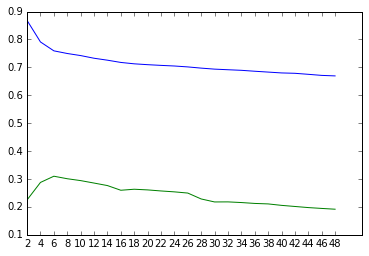

In [34]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n);

In [36]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)
samples, train, test = lc[0], lc[1], lc[2]

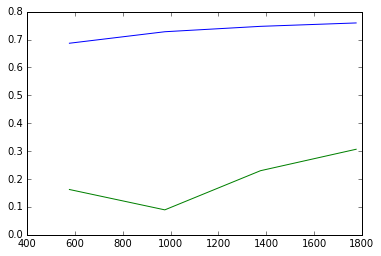

In [38]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])

---

<img src="../vol/img/learning_curve.png" width=500>

El modelo aún está aprendiendo, sin embargo no tenemos como obtener datos adicionales.

** Como solucionar el overfitting y el underfitting?**

Viarianza Alta:

- Conseguir más ejemplos
- Reducir cantidad de features
- Aumentar coeficiente de regularización

Bias Alto:

- Más features
- Modelo más complejo

Mal resultado general:

- Probar otro algoritmo/familia de modelos, quizás las hipotesis del modelo no son cumplidad por tu dataset